#**Ensemble**

Ensemble methods combine several trees base algorithms to construct better predictive performance than a single tree base algorithm. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner, thus increasing the accuracy of the model. When we try to predict the target variable using any machine learning technique, the main causes of difference in actual and predicted values are noise, variance, and bias. Ensemble helps to reduce these factors (except noise, which is irreducible error).


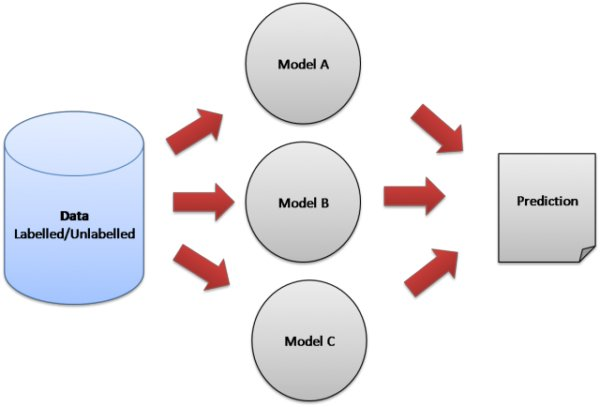

The fundamental principle of the ensemble model is that a group of weak learners come together to form a strong learner, which increases the accuracy of the model. When we try to predict the target variable by any machine learning technique, the main causes of the difference between the actual and predicted values are noise, variance and bias. The set reduces these factors (except noise, which is an irreducible error).

***Why we do Ensemble Learning?***

As we know that we have many reason to do Ensemble learning(Meta Machine learning).
* In the group of Algorithm, Several model are simple and take less computation power and some are complex and taking more computation.
When we put the model for production, that time accuracy and computation time is most important concern.
* Imagine that you have train a model with high accuracy But for real time application has no use. and in another scenario We have simple model(Simple Algorithm) may have less accuracy and not fit on data properly. In this cases, we compromise with accuracy and computation time.
* To Solve this problem, We can train a model on different algorithms(Weak Learners) to get a average result(Confidence index) from them. which will help you to implement real time application with very nice accuracy.

***Reasons to use ensemble***

1. The dataset is too large or small — If dataset is too large or small we have to use sampling to choose sample to take average of the result.
2. Complex(Non-linear) data — Real time dataset is mostly in non-linear fashion. so when we train a single model which cannot define the class boundary clearly and model become under-fit. That case we have to take different sub sample and take average of different model.
3. High Confidence — when we train a model with multiple classes and get high correlated output these situation lead the High Confidence. So, In this case most of the model predict the same class which lead that high confidence.



##**1-Bagging**

###Bagging — The Enemy of the Variance


Bagging, an acronym for bootstrap aggregation, creates and replaces samples from the data-set. In other words, each selected instance can be repeated several times in the same sample. We seem to increase our training data with bootstraps, which are each created and then used to create a classifier model. The final prediction is the average of all predictive models.
The most popular bagging algorithm commonly used by data scientist is the random forest based on the decision tree algorithm. Another useful algorithm is the pocket filling of the neighboring subspace closest to K (KNN), where basic students are based on the closest neighbor algorithm to k. We will discuss these algorithms in detail in the future.

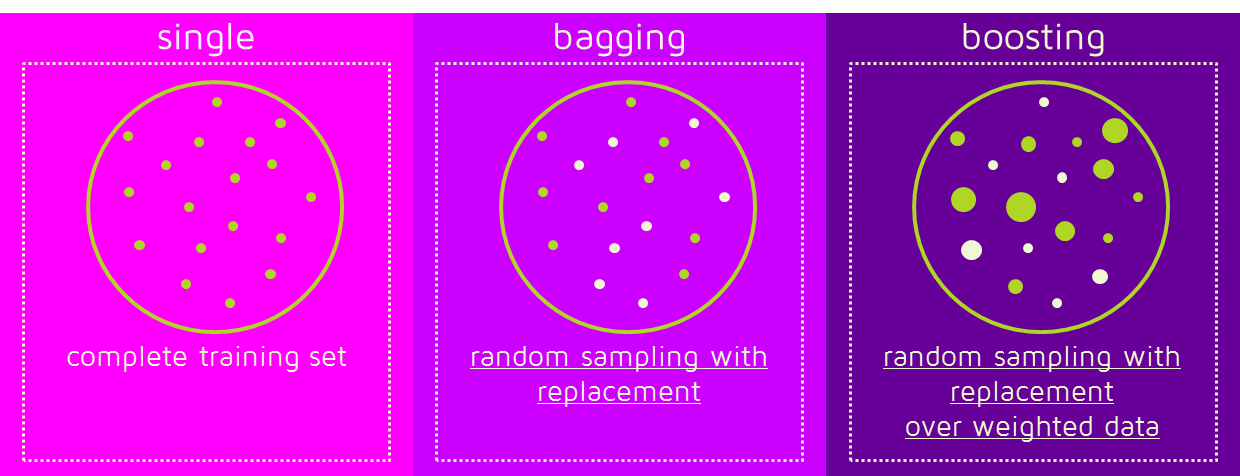

In [ ]:
# BAGGING

import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target

X_fit, X_eval, y_fit, y_test= model_selection.train_test_split( X, Y, test_size=0.30, random_state=1 )

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, X_fit, y_fit,cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+str(results[i]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: 0 Accuracy is: 1.0
Model: 1 Accuracy is: 1.0
Model: 2 Accuracy is: 1.0
Model: 3 Accuracy is: 0.9090909090909091
Model: 4 Accuracy is: 1.0
Model: 5 Accuracy is: 1.0
Model: 6 Accuracy is: 0.9
Model: 7 Accuracy is: 1.0
Model: 8 Accuracy is: 1.0
Model: 9 Accuracy is: 0.7


##**2-Boosting**

###Boosting- Give the power to weak learners

Boosting, is a provide the strength of weak learner and help machine learning model to prevent under-fitting and over-fitting. It is a process that multiple weak learners(machine learning models) train and combine their output to create strong learner from it. It is used to prevent under-when single machine learning model is not working well and also used to prevent over-fitting when machine learning model is not working well on the validation data-set.
1. ***Prevent Under-fitting when you have less number of training data.***
2.***Prevent Over-fitting when you have enough sample for training data-set still, it is not giving a good result on the validation data-set.***

There are many algorithms used by the data science community for classification and regression problems such as Adaboost, XGboost, Gradient Boosting, and so on.

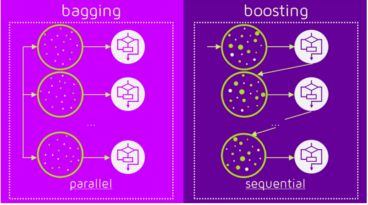

In [2]:
# BOOSTING

from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier  # Boosting Algorithm
from sklearn.tree import DecisionTreeClassifier
import numpy as np

iris = load_iris()
X = iris.data
Y = iris.target

X_fit, X_eval, y_fit, y_test= model_selection.train_test_split( X, Y, test_size=0.20, random_state=1)

cart = DecisionTreeClassifier()
num_trees = 25

model = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, learning_rate = 0.1)

model.fit(X_fit, y_fit)

pred_label = model.predict(X_eval)
nnz = np.float(np.shape(y_test)[0] - np.count_nonzero(pred_label - y_test))
acc = 100*nnz/np.shape(y_test)[0]

print('accuracy is: '+str(acc))

accuracy is: 96.66666666666667


##**3-Stacking**

###Stacking — Method that Improve your prediction Result

In Boosting, We have trained single decision tree which is known as weak learner or In Bagging, It can help us only to make a partial prediction to reduce the bias error from our model for that we need to increase the number of classifier in our ensemble frameworks. In same way, if the data-set is complex, a single solution might be give you the proper prediction rate, for this kind of scenario we need to combine multiple and different classifier, where the output of one classifier become the input of another.
Here Interesting part in the Stacking process come into the picture is that the new model is trained to combine prediction from previously trained models on the same data-set.

***What is Stacking?***

Stacking is an extension of the voting classifier or voting regressor by a higher level (blending level), which learns the best aggregation of the individual results. At the top of stacking is (at least) another classifier or regressor.
Stacking is particularly useful when the results of the individual algorithms can be very different, which is almost always the case with regression — since continuous values instead of a few classes. Stacking algorithms can even span several layers, which makes their training much more difficult.

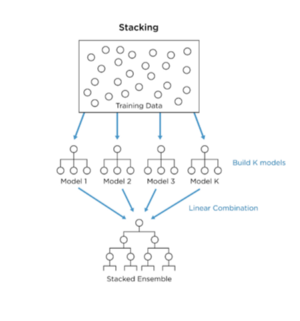

In [6]:
# STACKING 

from sklearn import datasets
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

def CalculateAccuracy(y_test, pred_label):
    nnz = np.shape(y_test)[0] - np.count_nonzero(pred_label - y_test)
    acc = 100*nnz / float(np.shape(y_test)[0])
    return acc

clf1 = KNeighborsClassifier(n_neighbors=2)

clf2 = RandomForestClassifier(n_estimators=2, random_state=1)

clf3 = GaussianNB()

lr = LogisticRegression()
#Now we will Train all first level classifiers
clf1.fit(X,	y)
clf2.fit(X,	y)
clf3.fit(X,	y)

f1 = clf1.predict(X)
acc1 = CalculateAccuracy(y,	f1)
print("accuracy from KNN: "+str(acc1))

f2 = clf2.predict(X)
acc2 = CalculateAccuracy(y,	f2)
print("accuracy from RF: "+str(acc2))

f3 = clf3.predict(X)
acc3 = CalculateAccuracy(y,	f3)
print("accuracy from GNB: "+str(acc3))

#Combine the predictions into a single array and transpose the array to match input shape of or classifier.
f = [f1, f2, f3]
f = np.transpose(f)

#Now train the classifier
lr.fit(f, y)
final = lr.predict(f)

#Calculate and print the accuracy of final classifier.
acc4 = CalculateAccuracy(y, final)
print("accuracy from Stacking:"+str(acc4))

accuracy from KNN: 96.66666666666667
accuracy from RF: 94.66666666666667
accuracy from GNB: 92.0
accuracy from Stacking:97.33333333333333


##**4-Blending**

Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. Here is a detailed explanation of the blending process

In [ ]:
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)
val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

# Combining the meta-features and the validation set, a logistic regression model is built to make predictions on the test set.

df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

##**5-Max Voting**

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

##**6-Averaging**

Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3

##**7-Weighted Average**

This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

##**8-Random Forest**

Random Forest is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.

Looking at it step-by-step, this is what a random forest model does:

1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

Note: The decision trees in random forest can be built on a subset of data and features. Particularly, the sklearn model of random forest uses all features for decision tree and a subset of features are randomly selected for splitting at each node.

To sum up, Random forest randomly selects data points and features, and builds multiple trees (Forest) .



In [7]:
# For Categorical Data

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


##**9-AdaBoost**

Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

Below are the steps for performing the AdaBoost algorithm:

1. Initially, all observations in the dataset are given equal weights.
2. A model is built on a subset of data.
3. Using this model, predictions are made on the whole dataset.
4. Errors are calculated by comparing the predictions and actual values.
5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

In [8]:
# For Categorical Data

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

clf.predict([[0, 0, 0, 0]])

clf.score(X, y)

0.983

In [11]:
# For Numerical Data

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X, y)

regr.predict([[0, 0, 0, 0]])

regr.score(X, y)

0.9771376939813696

##**10-Gradient Boosting(GBM)**

Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

In [13]:
# For Categorical Data

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

In [14]:
# For Numerical Data

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

reg.predict(X_test[1:2])

reg.score(X_test, y_test)

0.4403245677708285

##**11-XGBoost**

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

In [ ]:
# For Categorical Data

import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

In [ ]:
# For Numerical Data

import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

##**12-LightGBM**

Before discussing how Light GBM works, let’s first understand why we need this algorithm when we have so many others (like the ones we have seen above). Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern. The images below will help you understand the difference in a better way.

In [ ]:
# For Categorical Data

import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,185):
   if y_pred[i]>=0.5: 
   y_pred[i]=1
else: 
   y_pred[i]=0

In [ ]:
# For Numerical Data

import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,y_test)**0.5